In [1]:
import numpy as np
import pandas as pd
import os
from glob import glob
import scipy.io as sio
import matplotlib.pyplot as plt

from scipy.signal import correlate2d


In [2]:
# helper functions for visualization
def box_off():
    ax = plt.gca()
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    
def plot_corr_as_func_of_dist(corr):
    H, W = corr.shape  # H = 2*height-1, W = 2*width - 1
    
    height = int((H+1)/2)
    width = int((W+1)/2)
    
    # convert 2d corr to as a function of the distance from the center
    x = np.linspace(-(width-1), (width-1), W)
    y = np.linspace(-(height-1), (height-1), H)
    xx, yy = np.meshgrid(x, y)

    dist = np.sqrt(xx**2 + yy**2)

    #plt.imshow(dist)
    plt.plot(dist.ravel(), corr.ravel(), 'k.')
    
    plt.xlim(-5, min(width,height))
    
    box_off()
    
    plt.ylabel('correlation')
    plt.xlabel('distance')

## Choose a dataset 

In [5]:
data_path = 'data/WhiteNoise'
dataset = 'white64'

data_path = 'data/NaturalStimuli'
dataset = 'natmovie64'


mat_filenames = sorted(glob(os.path.join(data_path, dataset)+ '*.mat'))
print(mat_filenames)

['data/NaturalStimuli/natmovie64_a.mat', 'data/NaturalStimuli/natmovie64_b.mat', 'data/NaturalStimuli/natmovie64_c.mat']


## load a mat flie

In [8]:
filename = mat_filenames[0]
stim = sio.loadmat(filename)['stimulus'] / 255

height, width, num_frames = stim.shape

stim.shape

(64, 64, 9000)

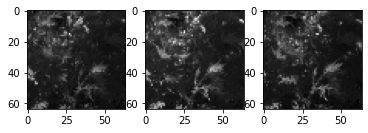

In [9]:
plt.subplot(131)
plt.imshow(stim[:,:,0], cmap='gray')
plt.subplot(132)
plt.imshow(stim[:,:,1], cmap='gray')
plt.subplot(133)
plt.imshow(stim[:,:,2], cmap='gray')

## calc spatial (auto-)correlation of a frame
* xcorr2 in matlab 
* https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.correlate2d.html

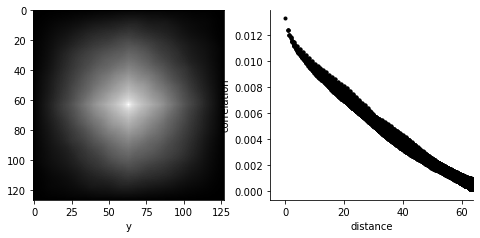

In [10]:
n=0
frame = stim[:,:,n]
corr = correlate2d(frame, frame) / width /height

plt.figure(figsize=(8,3.5))
plt.subplot(121)
plt.imshow(corr, cmap='gray')
plt.xlabel('x')
plt.xlabel('y')

plt.subplot(122)
# plot as a function from the center 
plot_corr_as_func_of_dist(corr)


In [11]:
num_frames = stim.shape[2]
corrs = []
for n in range(10): #range(num_frames):
    frame = stim[:,:,n]
    corrs.append(correlate2d(frame, frame) / width / height)
#     corr.shape

corrs = np.array(corrs)
avg_corr = np.mean(corrs, axis=0)

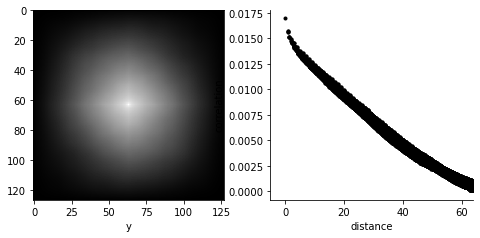

In [12]:
plt.figure(figsize=(8,3.5))
plt.subplot(121)
plt.imshow(avg_corr, cmap='gray')
plt.xlabel('x')
plt.xlabel('y')

plt.subplot(122)
# plot as a function from the center 
plot_corr_as_func_of_dist(avg_corr)